In [1]:
#HW5
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined = pd.merge(clinical_trial, mouse_drug, how = "outer", on = "Mouse ID")

# Display the data table for preview
combined.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_drug_timepoint = combined.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()

# Convert to DataFrame
mean_drug_timepoint.info() 

#Looks like it already converted to dataframe, but let's double check by checking whether empty or nonempty dataframe 
if mean_drug_timepoint.empty == True:
    print('DataFrame is empty')
else:
    print('DataFrame is not empty')
    
# Preview DataFrame
mean_drug_timepoint.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Drug                  100 non-null object
Timepoint             100 non-null int64
Tumor Volume (mm3)    100 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB
DataFrame is not empty


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_drug_timepoint = combined.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()
# Convert to DataFrame
se_drug_timepoint.info() 

#Looks like it already converted to dataframe, but let's double check by checking whether empty or nonempty dataframe 
if se_drug_timepoint.empty == True:
    print('DataFrame is empty')
else:
    print('DataFrame is not empty')

# Preview DataFrame
se_drug_timepoint.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Drug                  100 non-null object
Timepoint             100 non-null int64
Tumor Volume (mm3)    100 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB
DataFrame is not empty


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
munging_data = mean_drug_timepoint.pivot(index = 'Timepoint', columns ='Drug', values = 'Tumor Volume (mm3)') 
# Preview that Reformatting worked
munging_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


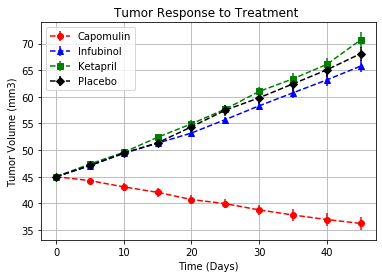

In [5]:
# Generate the Plot (with Error Bars)
capomulin_error = se_drug_timepoint.loc[se_drug_timepoint["Drug"] == "Capomulin", "Tumor Volume (mm3)"]
infubinol_error = se_drug_timepoint.loc[se_drug_timepoint["Drug"] == "Infubinol", "Tumor Volume (mm3)"]
ketapril_error = se_drug_timepoint.loc[se_drug_timepoint["Drug"] == "Ketapril", "Tumor Volume (mm3)"]
placebo_error = se_drug_timepoint.loc[se_drug_timepoint["Drug"] == "Placebo", "Tumor Volume (mm3)"]
time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.errorbar(time, munging_data["Capomulin"] , yerr= capomulin_error, label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.errorbar(time, munging_data["Infubinol"] , yerr= infubinol_error, label= "Infubinol", marker= "^", color="blue", linestyle='--')
plt.errorbar(time, munging_data["Ketapril"] , yerr= ketapril_error, label= "Ketapril", marker= "s", color="green", linestyle='--')
plt.errorbar(time, munging_data["Placebo"] , yerr= placebo_error , label= "Placebo", marker= "D", color="black", linestyle='--')
plt.legend()
plt.title("Tumor Response to Treatment ")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Save the Figure
plt.savefig("C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Homework/Unit_05_Matplotlib/Instructions/Images/Tumor_Response.png")

#C:\Users\Kyoo Ha Cha\Desktop\SMUGitlab\SMU_Homework\Unit_05_Matplotlib\Instructions\Images

In [6]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_sites = combined.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean().reset_index()

# Convert to DataFrame
mean_metastatic_sites.info() 

#Looks like it already converted to dataframe, but let's double check by checking whether empty or nonempty dataframe 
if mean_metastatic_sites.empty == True:
    print('DataFrame is empty')
else:
    print('DataFrame is not empty')
    
# Preview DataFrame
mean_metastatic_sites.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Drug                100 non-null object
Timepoint           100 non-null int64
Metastatic Sites    100 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB
DataFrame is not empty


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
se_metastatic_sites = combined.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem().reset_index()
# Convert to DataFrame
se_metastatic_sites.info() 

#Looks like it already converted to dataframe, but let's double check by checking whether empty or nonempty dataframe 
if se_metastatic_sites.empty == True:
    print('DataFrame is empty')
else:
    print('DataFrame is not empty')

# Preview DataFrame
se_metastatic_sites.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Drug                100 non-null object
Timepoint           100 non-null int64
Metastatic Sites    100 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB
DataFrame is not empty


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
munging_data2 = mean_metastatic_sites.pivot(index = 'Timepoint', columns ='Drug', values = 'Metastatic Sites') 
# Preview that Reformatting worked
munging_data2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


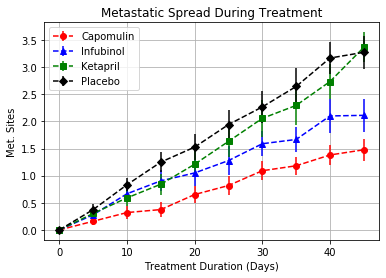

In [10]:
# Generate the Plot (with Error Bars)

capomulin_error2 = se_metastatic_sites.loc[se_metastatic_sites["Drug"] == "Capomulin", "Metastatic Sites"]
infubinol_error2 = se_metastatic_sites.loc[se_metastatic_sites["Drug"] == "Infubinol", "Metastatic Sites"]
ketapril_error2 = se_metastatic_sites.loc[se_metastatic_sites["Drug"] == "Ketapril", "Metastatic Sites"]
placebo_error2 = se_metastatic_sites.loc[se_metastatic_sites["Drug"] == "Placebo", "Metastatic Sites"]
time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.errorbar(time, munging_data2["Capomulin"] , yerr= capomulin_error2, label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.errorbar(time, munging_data2["Infubinol"] , yerr= infubinol_error2, label= "Infubinol", marker= "^", color="blue", linestyle='--')
plt.errorbar(time, munging_data2["Ketapril"] , yerr= ketapril_error2, label= "Ketapril", marker= "s", color="green", linestyle='--')
plt.errorbar(time, munging_data2["Placebo"] , yerr= placebo_error2 , label= "Placebo", marker= "D", color="black", linestyle='--')
plt.legend()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid()

# Save the Figure
plt.savefig("C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Homework/Unit_05_Matplotlib/Instructions/Images/Metastatic_Sites.png")

#C:\Users\Kyoo Ha Cha\Desktop\SMUGitlab\SMU_Homework\Unit_05_Matplotlib\Instructions\Images

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice = combined.groupby(['Drug', 'Timepoint'])['Mouse ID'].count().reset_index()

# Convert to DataFrame
count_mice.info() 

#Looks like it already converted to dataframe, but let's double check by checking whether empty or nonempty dataframe 
if count_mice.empty == True:
    print('DataFrame is empty')
else:
    print('DataFrame is not empty')
    
# Preview DataFrame
count_mice.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Drug         100 non-null object
Timepoint    100 non-null int64
Mouse ID     100 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.4+ KB
DataFrame is not empty


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
munging_data3 = count_mice.pivot(index = 'Timepoint', columns ='Drug', values = 'Mouse ID') 
# Preview that Reformatting worked
munging_data3

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


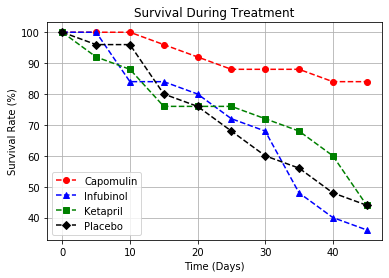

In [13]:
# Generate the Plot (Accounting for percentages)

capomulin_count = count_mice.loc[count_mice["Drug"] == "Capomulin", "Mouse ID"].max()
infubinol_count = count_mice.loc[count_mice["Drug"] == "Infubinol", "Mouse ID"].max()
ketapril_count = count_mice.loc[count_mice["Drug"] == "Ketapril", "Mouse ID"].max()
placebo_count = count_mice.loc[count_mice["Drug"] == "Placebo", "Mouse ID"].max()
time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.plot(time, munging_data3["Capomulin"]/capomulin_count*100 , label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.plot(time, munging_data3["Infubinol"]/infubinol_count*100 , label= "Infubinol", marker= "^", color="blue", linestyle='--')
plt.plot(time, munging_data3["Ketapril"]/ketapril_count*100 , label= "Ketapril", marker= "s", color="green", linestyle='--')
plt.plot(time, munging_data3["Placebo"]/placebo_count*100 , label= "Placebo", marker= "D", color="black", linestyle='--')
plt.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()

# Save the Figure
plt.savefig("C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Homework/Unit_05_Matplotlib/Instructions/Images/Survival_Rate.png")


# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
capomulin_changepercent=(munging_data["Capomulin"].iloc[9]-munging_data["Capomulin"].iloc[0])/munging_data["Capomulin"].iloc[0]*100
capomulin_changepercent

ceftamin_changepercent=(munging_data["Ceftamin"].iloc[9]-munging_data["Ceftamin"].iloc[0])/munging_data["Ceftamin"].iloc[0]*100
ceftamin_changepercent

infubinol_changepercent=(munging_data["Infubinol"].iloc[9]-munging_data["Infubinol"].iloc[0])/munging_data["Infubinol"].iloc[0]*100
infubinol_changepercent

ketapril_changepercent=(munging_data["Ketapril"].iloc[9]-munging_data["Ketapril"].iloc[0])/munging_data["Ketapril"].iloc[0]*100
ketapril_changepercent

naftisol_changepercent=(munging_data["Naftisol"].iloc[9]-munging_data["Naftisol"].iloc[0])/munging_data["Naftisol"].iloc[0]*100
naftisol_changepercent

placebo_changepercent=(munging_data["Placebo"].iloc[9]-munging_data["Placebo"].iloc[0])/munging_data["Placebo"].iloc[0]*100
placebo_changepercent

propriva_changepercent=(munging_data["Propriva"].iloc[9]-munging_data["Propriva"].iloc[0])/munging_data["Propriva"].iloc[0]*100
propriva_changepercent

ramicane_changepercent=(munging_data["Ramicane"].iloc[9]-munging_data["Ramicane"].iloc[0])/munging_data["Ramicane"].iloc[0]*100
ramicane_changepercent

stelasyn_changepercent=(munging_data["Stelasyn"].iloc[9]-munging_data["Stelasyn"].iloc[0])/munging_data["Stelasyn"].iloc[0]*100
stelasyn_changepercent

zoniferol_changepercent=(munging_data["Zoniferol"].iloc[9]-munging_data["Zoniferol"].iloc[0])/munging_data["Zoniferol"].iloc[0]*100
zoniferol_changepercent

# Display the data to confirm
to_dataframe = {'Capomulin': capomulin_changepercent, 
     'Ceftamin' : ceftamin_changepercent,
     'Infubinol': infubinol_changepercent, 
     'Ketapril': ketapril_changepercent, 
     'Naftisol': naftisol_changepercent,
     'Placebo': placebo_changepercent,
     'Propriva': propriva_changepercent,
     'Ramicane': ramicane_changepercent,
     'Stelasyn': stelasyn_changepercent,
     'Zoniferol': zoniferol_changepercent
    }
percent_change = pd.Series(to_dataframe)
percent_change


Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

![Metastatic Spread During Treatment](../Images/change.png)

In [15]:
# Store all Relevant Percent Changes into a Tuple
to_dataframe = {'Capomulin': capomulin_changepercent, 
                'Infubinol': infubinol_changepercent, 
                 'Ketapril': ketapril_changepercent, 
                 'Placebo': placebo_changepercent}

percent_change = pd.Series(to_dataframe)
percent_change


tuple_percent_change = list(tuple(zip(percent_change.index, percent_change)))
tuple_percent_change

[('Capomulin', -19.475302667894155),
 ('Infubinol', 46.12347172785184),
 ('Ketapril', 57.02879468660604),
 ('Placebo', 51.29796048315153)]

In [16]:
# Splice the data between passing and failing drugs
passing_drugs_list = []
failing_drugs_list = []
index_passing_drugs_list = []
index_failing_drugs_list = []
for i, drugs in tuple_percent_change :
    if drugs > 0 :
        passing_drug = drugs
        passing_drugs_list.append(drugs)
        index_passing_drugs_list.append(i)
    else :
        failing_drugs = drugs
        failing_drugs_list.append(drugs)
        index_failing_drugs_list.append(i)
passing_drugs = list(zip(index_passing_drugs_list, passing_drugs_list))
print(f"Passing Drugs are: {passing_drugs}")
failing_drugs = list(zip(index_failing_drugs_list, failing_drugs_list))
print(f"Failing Drug is: {failing_drugs}")

Passing Drugs are: [('Infubinol', 46.12347172785184), ('Ketapril', 57.02879468660604), ('Placebo', 51.29796048315153)]
Failing Drug is: [('Capomulin', -19.475302667894155)]


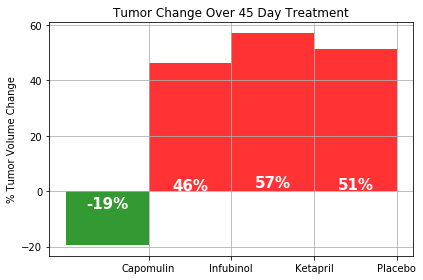

In [17]:
# Orient widths. Add labels, tick marks, etc. 

# Create a figure object.
fig = plt.figure()
#subplot grid parameters
grid = fig.add_subplot(1,1,1)
# Get percent change value..subsetting cure vs not cure
y_cure = [percent_change["Capomulin"]]
y_no_cure = [percent_change["Infubinol"], percent_change["Ketapril"], percent_change["Placebo"]]
# Bar locations for negative percentage change
x_cure = [0]
# Bar locations for positive percentage change
x_no_cure = [1, 2, 3]
# Bar for negative change (Capomulin)
bars_cure = grid.bar(x_cure, y_cure, align="edge", width = -1,color='green', alpha=0.8)
# Bar for positive change (Infubinol, Ketapril, Placebo)
bars_no_cure = grid.bar(x_no_cure, y_no_cure, align="edge", width = -1, color='red', alpha=0.8)
x_labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plt.setp(grid, xticks=[0, 1, 2, 3], xticklabels=["Capomulin", "Infubinol", "Ketapril", "Placebo"], yticks=[-20, 0, 20, 40, 60])
grid.set_ylabel("% Tumor Volume Change")
grid.set_title("Tumor Change Over 45 Day Treatment")
grid.grid()

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        grid.text(rect.get_x() + rect.get_width()/2, .1*height, "%d" %int(height)+ "%", ha="center", va="top", color="white",weight = "bold",fontsize = 15)

# Call functions to implement the function calls     
autolabel(bars_no_cure)
autolabel(bars_cure)
fig.tight_layout()

# Save the Figure
plt.savefig("C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Homework/Unit_05_Matplotlib/Instructions/Images/Percent_Change.png")

# Show the Figure
fig.show()